# Genocide in Gaza: Telling the Story through Data Science!

In [376]:
# Uncomment and Install the below packages, if not yet done.
# ! pip install pdfplumber
# ! pip install arabic_reshaper
# ! pip install python-bidi

In [378]:
# Run this cell to set up the notebook.
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
np.set_printoptions(legacy='1.13')

import warnings
warnings.simplefilter('ignore')

## 1. Preprocessing 

### 1.A Converting the PDF list in the "killed-in-gaza_moh_2024-09-21.pdf" file to CSV.



In [381]:
import pdfplumber
import csv
import arabic_reshaper
from bidi.algorithm import get_display

*Note: Run the below cell only once for the first time, it might take some time to create the CSV file

In [384]:
base_dataset_dir = "datasets/"

In [9]:
def fix_arabic(text):
    if text:
        #v1
        # reshaped_text = arabic_reshaper.reshape(text)
        # return get_display(reshaped_text);
        # v2
        # reshaped_text = get_display(text)
        # arabic_text = arabic_reshaper.reshape(reshaped_text)
        # return arabic_text;
        return get_display(text);
    return text

with pdfplumber.open(base_dataset_dir+"killed-in-gaza_moh_2025-03-23.pdf") as pdf:
    with open(base_dataset_dir+"killed-in-gaza_moh_2025-03-23.csv", "w", newline="", encoding='utf-8-sig') as f:
        writer = csv.writer(f)
        for page in pdf.pages:
            table = page.extract_table()
            if table:
                for row in table:
                    # Fix only the Arabic column (column index 2)
                    fixed_row = [];
                    for i, cell in enumerate(row):
                        if i == 2:
                            fixed_row.append(fix_arabic(cell))
                        else:
                            fixed_row.append(cell)
                    writer.writerow(fixed_row);

CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, def

### 1.B Converting the JSON list in the "infrastructure-damaged.json" file to CSV.

In [29]:
import json
import csv
with open(base_dataset_dir+"infrastructure-damaged_2025-04-12.json", "r") as f:
    data = json.load(f)
    with open(base_dataset_dir+"infrastructure-damaged.csv", "w", newline="") as f:
        writer = csv.writer(f)
        writer.writerow(data[0].keys())
        for item in data:
            writer.writerow(item.values())
    print("CSV file created successfully.")


CSV file created successfully.


In [31]:
import csv
import json

input_csv_file = base_dataset_dir+"infrastructure-damaged.csv"
output_csv_file = base_dataset_dir+"infrastructure-damaged_fixed.csv"

def fix_data(input_file, output_file):
    with open(base_dataset_dir+"infrastructure-damaged_2025-04-12.json", "r") as f:
        data = json.load(f)

    all_keys = {
        "report_date",
        "civic_buildings",
        "educational_buildings",
        "places_of_worship",
        "residential",
    }

    civic_keys = {"destroyed", "ext_destroyed"}
    educational_keys = {"destroyed", "ext_destroyed", "damaged", "ext_damaged"}
    worship_keys = {
        "mosques_destroyed",
        "ext_mosques_destroyed",
        "mosques_damaged",
        "ext_mosques_damaged",
        "churches_destroyed",
        "ext_churches_destroyed",
    }
    residential_keys = {"destroyed", "ext_destroyed", "damaged", "ext_damaged"}

    with open(output_file, "w", newline="") as f:
        writer = csv.writer(f)

        header = [
            "report_date",
            "civic_destroyed",
            "civic_ext_destroyed",
            "edu_destroyed",
            "edu_ext_destroyed",
            "edu_damaged",
            "edu_ext_damaged",
            "worship_mosques_destroyed",
            "worship_ext_mosques_destroyed",
            "worship_mosques_damaged",
            "worship_ext_mosques_damaged",
            "worship_churches_destroyed",
            "worship_ext_churches_destroyed",
            "residential_destroyed",
            "residential_ext_destroyed",
            "residential_damaged",
            "residential_ext_damaged",
        ]
        writer.writerow(header)

        # Process each item in the JSON data
        for item in data:
            report_date = item.get("report_date", "")

            civic = item.get("civic_buildings", {})
            civic_destroyed = civic.get("destroyed", 0)
            civic_ext_destroyed = civic.get("ext_destroyed", 0)

            edu = item.get("educational_buildings", {})
            edu_destroyed = edu.get("destroyed", 0)
            edu_ext_destroyed = edu.get("ext_destroyed", 0)
            edu_damaged = edu.get("damaged", 0)
            edu_ext_damaged = edu.get("ext_damaged", 0)

            worship = item.get("places_of_worship", {})
            worship_mosques_destroyed = worship.get("mosques_destroyed", 0)
            worship_ext_mosques_destroyed = worship.get("ext_mosques_destroyed", 0)
            worship_mosques_damaged = worship.get("mosques_damaged", 0)
            worship_ext_mosques_damaged = worship.get("ext_mosques_damaged", 0)
            worship_churches_destroyed = worship.get("churches_destroyed", 0)
            worship_ext_churches_destroyed = worship.get("ext_churches_destroyed", 0)

            residential = item.get("residential", {})
            residential_destroyed = residential.get("destroyed", 0)
            residential_ext_destroyed = residential.get("ext_destroyed", 0)
            residential_damaged = residential.get("damaged", 0)
            residential_ext_damaged = residential.get("ext_damaged", 0)

            row = [
                report_date,
                civic_destroyed,
                civic_ext_destroyed,
                edu_destroyed,
                edu_ext_destroyed,
                edu_damaged,
                edu_ext_damaged,
                worship_mosques_destroyed,
                worship_ext_mosques_destroyed,
                worship_mosques_damaged,
                worship_ext_mosques_damaged,
                worship_churches_destroyed,
                worship_ext_churches_destroyed,
                residential_destroyed,
                residential_ext_destroyed,
                residential_damaged,
                residential_ext_damaged,
            ]
            writer.writerow(row)

    print(f"CSV file '{output_file}' created successfully.")


fix_data(input_csv_file, output_csv_file)

CSV file 'datasets/infrastructure-damaged_fixed.csv' created successfully.


## 2. Exploratory Analysis & Visualization 

In [386]:
killed_in_gaza = Table.read_table(base_dataset_dir+'killed-in-gaza_moh_2025-03-23.csv')
killed_in_gaza.show(5)

Index,Name,ا#سم,Born,Age,Sex,ID number
1,Mohammed Hani Mohammed Al-Zahhar,محمد هاني محمد الزهار,2023-08-09,0,m,444196471
2,Nour Mohammed Aed Udwan,نور محمد عائد عدوان,2023-02-27,0,f,444484729
3,Khaled Mumin Amin Shabir,خالد مؤمن ام6 شبير,2023-04-16,0,m,444799647
4,Yamen Ibrahim Farid Qaddoura,يامن ابراهيم فريد قدوره,2023-06-10,0,m,445958408
5,Ahmed Rami Ahmed Abdel Qadir,أحمد رامي أحمد عبد القادر,2022-12-22,0,m,445808546


In [388]:
infrastructure = Table.read_table(base_dataset_dir+'infrastructure-damaged_fixed.csv')
infrastructure.show(5)

report_date,civic_destroyed,civic_ext_destroyed,edu_destroyed,edu_ext_destroyed,edu_damaged,edu_ext_damaged,worship_mosques_destroyed,worship_ext_mosques_destroyed,worship_mosques_damaged,worship_ext_mosques_damaged,worship_churches_destroyed,worship_ext_churches_destroyed,residential_destroyed,residential_ext_destroyed,residential_damaged,residential_ext_damaged
2023-10-07,0,5,0,1,0,15,0,2,0,4,0,0,0,80,0,0
2023-10-08,0,11,0,1,0,30,0,4,0,8,0,0,159,159,0,0
2023-10-09,0,16,0,2,0,45,0,6,0,12,0,0,790,790,0,0
2023-10-10,0,22,0,2,0,60,0,8,0,17,0,0,1009,1009,0,0
2023-10-11,27,27,3,3,75,75,10,10,0,21,0,0,2835,2835,0,0


In [390]:
# Daily casualities in Gaza
gaza_casualties = Table.read_table(base_dataset_dir+'casualties_daily_gaza_2025-04-12.csv')
gaza_casualties.show(5);

report_date,report_source,report_period,ext_massacres_cum,killed,killed_cum,ext_killed,ext_killed_cum,ext_killed_children_cum,ext_killed_women_cum,injured_cum,ext_injured,ext_injured_cum,ext_civdef_killed_cum,med_killed_cum,ext_med_killed_cum,press_killed_cum,ext_press_killed_cum
2023-10-07,mohtel,24,0,232,232,232,232,0,0,1610,1610,1610,0,6,6,1,1
2023-10-08,mohtel,24,0,138,370,138,370,78,41,1788,178,1788,0,nan,6,1,1
2023-10-09,mohtel,24,8,190,560,190,560,91,61,2271,483,2271,0,6,6,3,3
2023-10-10,mohtel,24,8,340,900,340,900,260,230,4000,1729,4000,0,nan,6,7,7
2023-10-11,gmotel,24,23,200,1100,200,1100,398,230,5184,1184,5184,0,10,10,nan,7


In [392]:
# Daily casualities in West Bank
westbank_casualties = Table.read_table(base_dataset_dir+'casualties_daily_west_bank_2025-04-12.csv')
westbank_casualties.show(5);

report_date,verified.killed,verified.killed_cum,verified.injured,verified.injured_cum,verified.killed_children,verified.killed_children_cum,verified.injured_children,verified.injured_children_cum,killed_cum,killed_children_cum,injured_cum,injured_children_cum,settler_attacks_cum,flash_source
2023-10-07,6,6,197,197,2,2,31,31,3,0,23,1,3,un
2023-10-08,8,14,127,324,3,5,7,38,13,1,194,1,9,un
2023-10-09,4,18,88,412,0,5,19,57,15,3,295,34,19,un
2023-10-10,5,23,72,484,0,5,7,64,19,3,332,39,29,un
2023-10-11,6,29,85,569,2,7,17,81,26,3,427,62,39,un


### Plotting some raw data

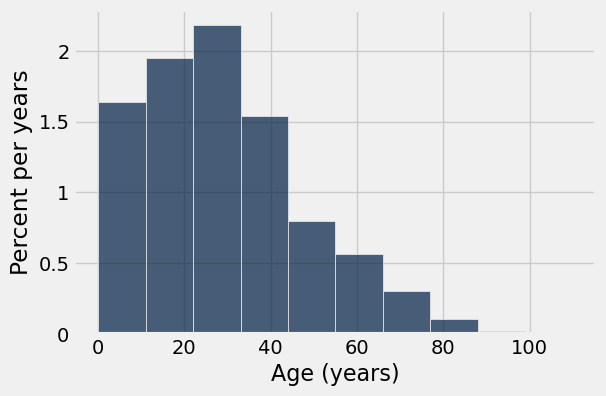

In [395]:
# 1) Age Distribution of Victims in Gaza
killed_in_gaza.hist('Age', unit="years")
plt.show();

In [397]:
gaza_casualties.show(3)

report_date,report_source,report_period,ext_massacres_cum,killed,killed_cum,ext_killed,ext_killed_cum,ext_killed_children_cum,ext_killed_women_cum,injured_cum,ext_injured,ext_injured_cum,ext_civdef_killed_cum,med_killed_cum,ext_med_killed_cum,press_killed_cum,ext_press_killed_cum
2023-10-07,mohtel,24,0,232,232,232,232,0,0,1610,1610,1610,0,6,6,1,1
2023-10-08,mohtel,24,0,138,370,138,370,78,41,1788,178,1788,0,nan,6,1,1
2023-10-09,mohtel,24,8,190,560,190,560,91,61,2271,483,2271,0,6,6,3,3


In [399]:
infrastructure.show(5)

report_date,civic_destroyed,civic_ext_destroyed,edu_destroyed,edu_ext_destroyed,edu_damaged,edu_ext_damaged,worship_mosques_destroyed,worship_ext_mosques_destroyed,worship_mosques_damaged,worship_ext_mosques_damaged,worship_churches_destroyed,worship_ext_churches_destroyed,residential_destroyed,residential_ext_destroyed,residential_damaged,residential_ext_damaged
2023-10-07,0,5,0,1,0,15,0,2,0,4,0,0,0,80,0,0
2023-10-08,0,11,0,1,0,30,0,4,0,8,0,0,159,159,0,0
2023-10-09,0,16,0,2,0,45,0,6,0,12,0,0,790,790,0,0
2023-10-10,0,22,0,2,0,60,0,8,0,17,0,0,1009,1009,0,0
2023-10-11,27,27,3,3,75,75,10,10,0,21,0,0,2835,2835,0,0


## For Daily Casualty In Gaza

In [402]:
# Function to extract the month and year of the report date, so that we could group them by months
def extract_month_and_year_from_date(date):
    return date[:7];

# Array of extracted year and month
year_and_month = gaza_casualties.apply(extract_month_and_year_from_date, 'report_date');

gaza_with_months = gaza_casualties.select('report_date','ext_killed').with_column("year-month", year_and_month)
gaza_with_months.show(5)

report_date,ext_killed,year-month
2023-10-07,232,2023-10
2023-10-08,138,2023-10
2023-10-09,190,2023-10
2023-10-10,340,2023-10
2023-10-11,200,2023-10


In [404]:
monthly_killed = gaza_with_months.group('year-month', np.sum).drop('report_date sum')
monthly_killed.show(19)

year-month,ext_killed sum
2023-10,8525
2023-11,6275
2023-12,7022
2024-01,5078
2024-02,3135
2024-03,2747
2024-04,1753
2024-05,1749
2024-06,1593
2024-07,1568


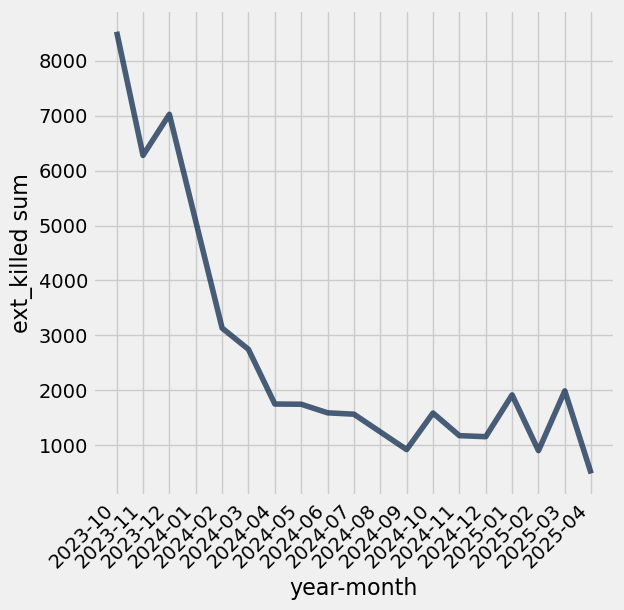

In [406]:
monthly_killed.plot('year-month','ext_killed sum')
plt.xticks(rotation=45, ha='right')  # Rotate 45 degrees and align right
plt.show();

In [408]:
# Array of extracted year and month
# We will only deal with the extrapolated data
year_and_month = infrastructure.apply(extract_month_and_year_from_date, 'report_date');

infrastructure_with_months = infrastructure.select('report_date','residential_ext_destroyed').with_column("year-month", year_and_month)
infrastructure_with_months.show(5)

report_date,residential_ext_destroyed,year-month
2023-10-07,80,2023-10
2023-10-08,159,2023-10
2023-10-09,790,2023-10
2023-10-10,1009,2023-10
2023-10-11,2835,2023-10


In [410]:
monthly_destroyed = infrastructure_with_months.group('year-month', np.max).drop('report_date max')  #We take the max because its cummalative
monthly_destroyed.show(5);

year-month,residential_ext_destroyed max
2023-10,33571
2023-11,50000
2023-12,65000
2024-01,70000
2024-02,70000


In [412]:
# Step 1: Get the column of cumulative values
cumulative_res = monthly_destroyed.column('residential_ext_destroyed max')


# Step 2: Create a list for monthly values
monthly_res = [cumulative_res[0]]  # The first month's value is the same as cumulative


# Step 3: Loop through the rest and compute monthly differences
for i in range(1, len(cumulative_res)):
    monthly_value_res = cumulative_res[i] - cumulative_res[i - 1]
    monthly_res.append(monthly_value_res)


# Step 4: Add the monthly values as a new column
monthly_destroyed = monthly_destroyed.with_column('Residential Destroyed', monthly_res).drop(1)


# Step 5: Preview the result
monthly_destroyed.show(18)


year-month,Residential Destroyed
2023-10,33571
2023-11,16429
2023-12,15000
2024-01,5000
2024-02,0
2024-03,0
2024-04,16000
2024-05,1000
2024-06,63000
2024-07,0


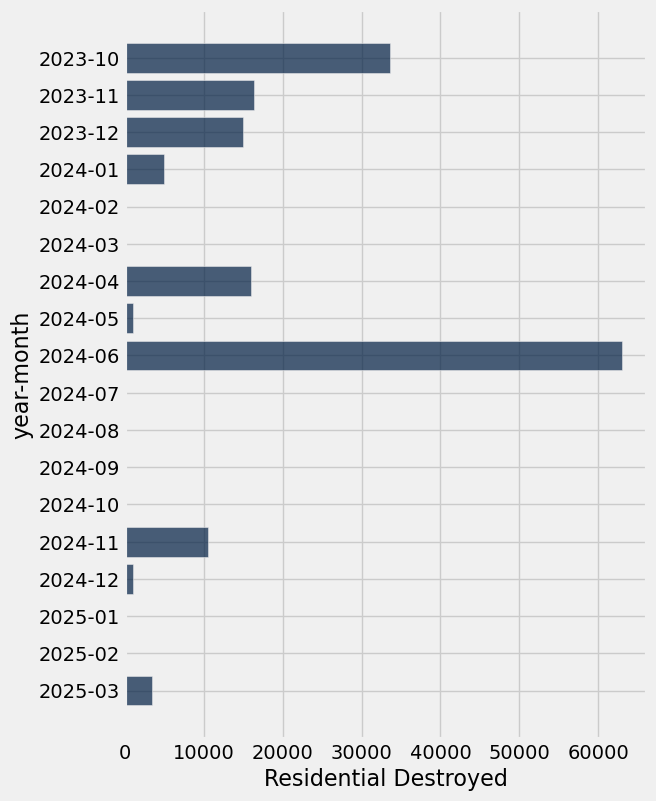

In [414]:
monthly_destroyed.barh('year-month','Residential Destroyed')
plt.show();

In [416]:
# Join the tables on 'year-month'
combined = monthly_destroyed.join('year-month', monthly_killed, 'year-month')

# Preview the merged table
combined.show()

year-month,Residential Destroyed,ext_killed sum
2023-10,33571,8525
2023-11,16429,6275
2023-12,15000,7022
2024-01,5000,5078
2024-02,0,3135
2024-03,0,2747
2024-04,16000,1753
2024-05,1000,1749
2024-06,63000,1593
2024-07,0,1568


## Plot 1

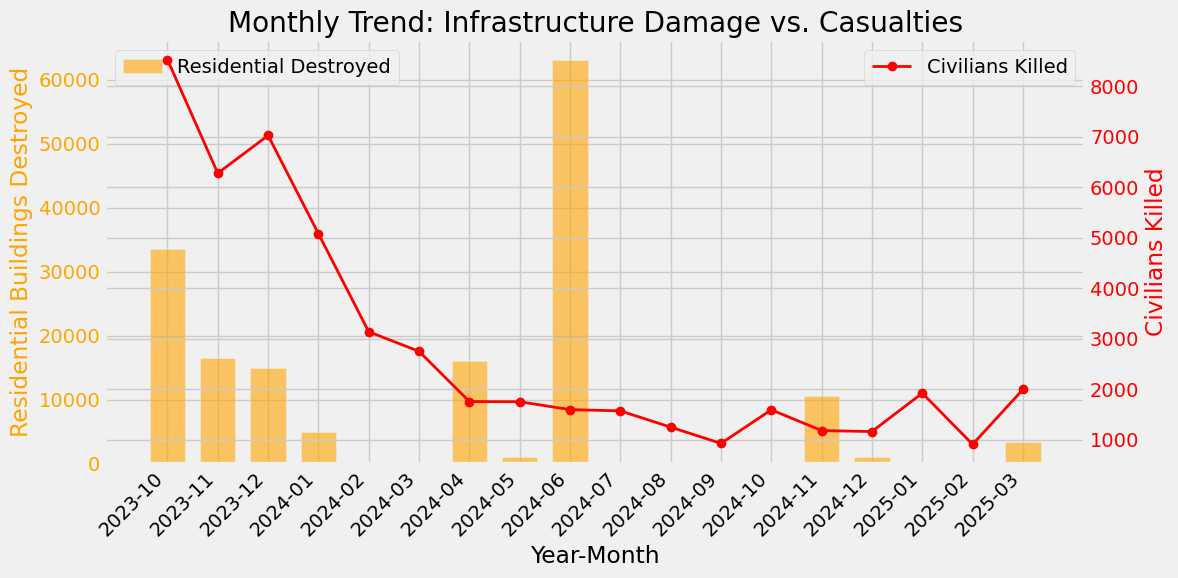

In [419]:
# Extract data from the joined table
months = combined.column('year-month')
destroyed = combined.column('Residential Destroyed')
killed = combined.column('ext_killed sum')

# Initialize figure and primary axis (for bars)
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar chart (Infrastructure Damage - Left Y-axis)
ax1.bar(months, destroyed, color='orange', alpha=0.6, 
        label='Residential Destroyed', width=0.7)
ax1.set_xlabel('Year-Month')
ax1.set_ylabel('Residential Buildings Destroyed', color='orange')
ax1.tick_params(axis='y', labelcolor='orange')
ax1.set_xticklabels(months, rotation=45, ha='right')

# Line graph (Casualties - Right Y-axis)
ax2 = ax1.twinx()
ax2.plot(months, killed, color='red', marker='o', 
         linewidth=2, label='Civilians Killed')
ax2.set_ylabel('Civilians Killed', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Customize the chart
plt.title('Monthly Trend: Infrastructure Damage vs. Casualties')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.tight_layout()  # Prevent label clipping
plt.show()

## Insights gained from the Overlaid Graph


- The overlaid bar and line chart illustrates the correlation between civilian infrastructure damage and casualty rates in Gaza from October 2023 to March 2025. October 2023 is marked with the highest civilian fatalities (around 8,000) and most residential building damage (over 30,000). This pattern of high casualties matching heavy damage persists through the last few months of 2023, reflecting the high-intensity initial phase of the conflict.

- One notable point is the consistent decline in civilian casualties from early 2024 onwards, even as the destruction of buildings continues ocassionally. Notably, February and March 2024 show a sharp drop in both casualties and infrastructure damage, coinciding with a ceasefire during that period. Similarly, early 2025 (January–February) also shows another ceasefire, which explains the absence of heavy damage during these months.

- Most notably, in June 2024, infrastructure destruction rose significantly with no corresponding increase in civilian deaths to accompany it. This is a shift in the nature of attacks—rendered as targeted demolitions rather than high-casualty attacks. 

- Overall, since the initial period suggested high correlation between damage and casualties, the periods that followed suggest that massive destruction of infrastructure can occur independently, most likely due to strategic or political reasons such as ceasefires and changing warfare tactics.


## Error Distribution between data from flash and UN verified reports on cumulative numbers in West Bank (Histogram)

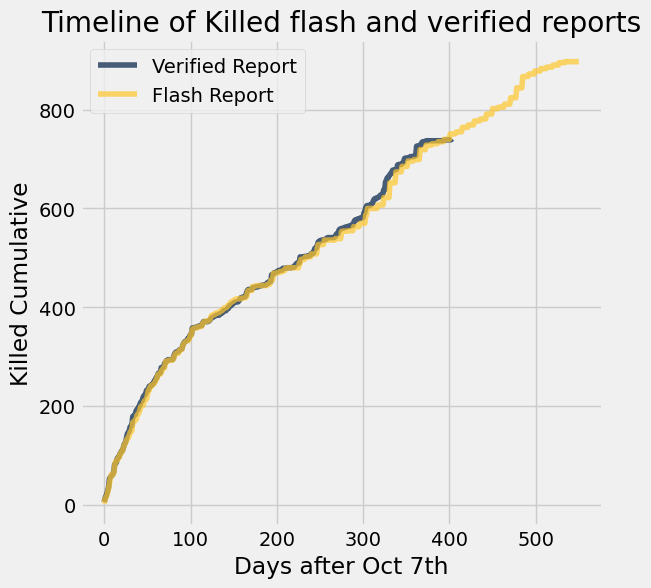

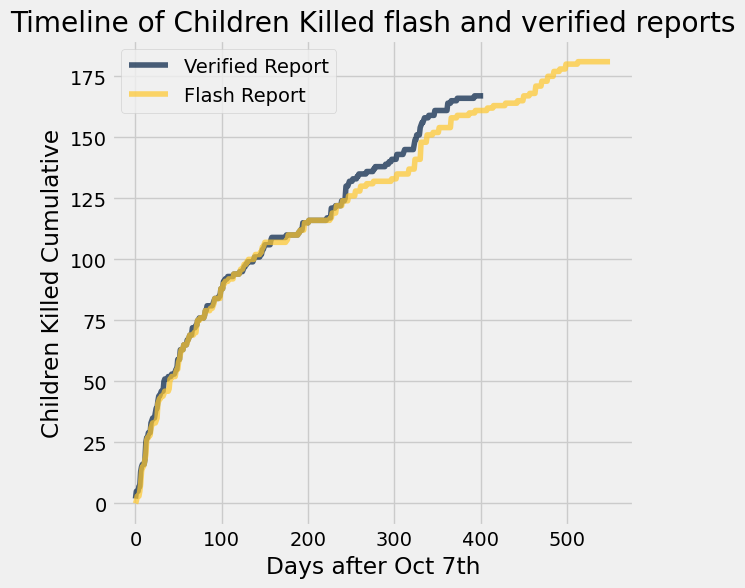

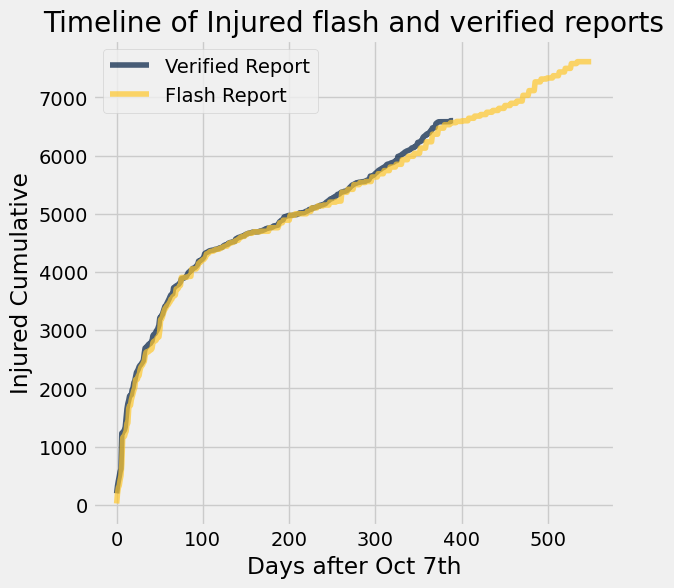

In [423]:
wb_timeline = westbank_casualties.with_column("Days after Oct 7th", np.arange(0, westbank_casualties.num_rows))
wb_timeline_killed_cum = wb_timeline.select("verified.killed_cum", "killed_cum",  "Days after Oct 7th")
wb_timeline_killed_child_cum = wb_timeline.select("verified.killed_children_cum", "killed_children_cum",  "Days after Oct 7th")
wb_timeline_injured_cum = wb_timeline.select("verified.injured_cum", "injured_cum",  "Days after Oct 7th")\

wb_timeline_killed_cum.plot("Days after Oct 7th")
plt.legend(["Verified Report", "Flash Report"])
plt.title("Timeline of Killed flash and verified reports")
plt.ylabel("Killed Cumulative")

wb_timeline_killed_child_cum.plot("Days after Oct 7th")
plt.legend(["Verified Report", "Flash Report"])
plt.title("Timeline of Children Killed flash and verified reports")
plt.ylabel("Children Killed Cumulative")

wb_timeline_injured_cum.plot("Days after Oct 7th")
plt.legend(["Verified Report", "Flash Report"])
plt.title("Timeline of Injured flash and verified reports")
plt.ylabel("Injured Cumulative")

plt.show()

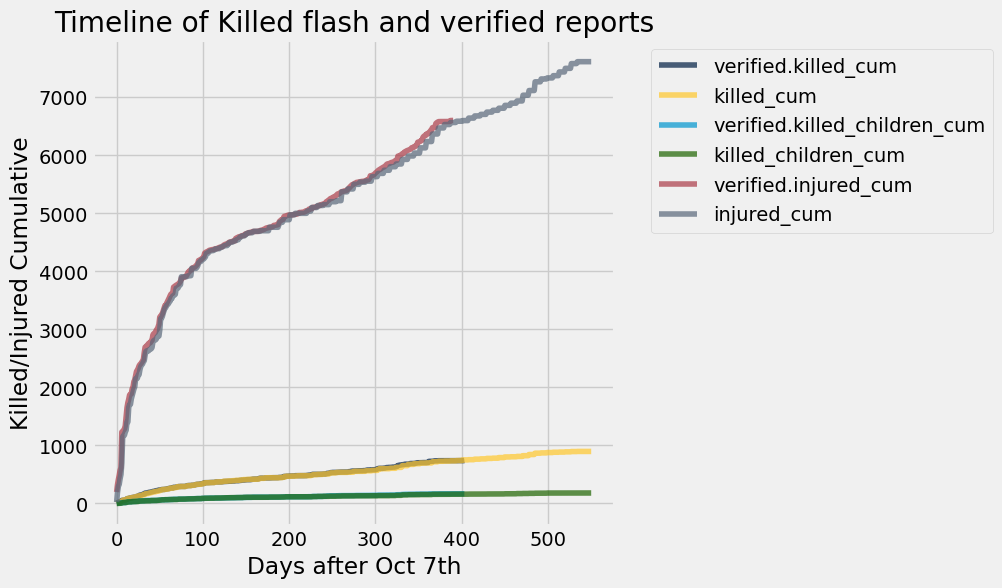

In [425]:
# Overlaid graph
wb_timeline_overlaid = wb_timeline.select("verified.killed_cum", "killed_cum", "verified.killed_children_cum", "killed_children_cum", "verified.injured_cum", "injured_cum", "Days after Oct 7th")
wb_timeline_overlaid.plot("Days after Oct 7th")
plt.title("Timeline of Killed flash and verified reports")
plt.ylabel("Killed/Injured Cumulative")
plt.show()

In [427]:
def daily_stats_from_cumulative(table, col_label):
    return np.append(table.column(col_label).item(0), np.diff(table.column(col_label)))

In [429]:
# Daily Number of killed persons
wb_diff_killed_cum = daily_stats_from_cumulative(westbank_casualties, "killed_cum")

# Daily Number of killed children
wb_diff_killed_child_cum = daily_stats_from_cumulative(westbank_casualties, "killed_children_cum")

# Daily Number of injured persons
wb_diff_injured_cum =  daily_stats_from_cumulative(westbank_casualties, "injured_cum")

In [431]:
# Lets try to display the error on a histogram to visualize the error distrbution in each report
wb_error_killed =  wb_diff_killed_cum - westbank_casualties.column("verified.killed")
wb_error_child = wb_diff_killed_child_cum - westbank_casualties.column("verified.killed_children")
wb_error_injured = wb_diff_injured_cum - westbank_casualties.column("verified.injured")

wb_error_killed, wb_error_child, wb_error_injured

(array([ -3.,   2.,  -2.,  -1.,   1.,   0.,  -7.,   8.,   5.,  -2.,  -3.,
         -1.,   0.,   7.,  -2.,  -5.,   2.,  -1.,   1.,  -1.,   1.,   0.,
          1.,  -1.,  -1.,   1.,  -5.,  -4.,   0.,   0.,  -1.,   1.,  -1.,
         -1.,   0.,  -1.,   2.,  -7.,   7.,   1.,  -3.,   3.,   1.,   0.,
         -1.,  -7.,   5.,   0.,   0.,  -5.,   6.,   9.,  -6.,   6.,   1.,
          0.,  -1.,   0.,  -3.,   2.,  -1.,   2.,   1.,  -1.,   0.,   0.,
         -5.,   0.,   5.,   1.,  -8.,  11.,  -3.,   0.,  -2.,   2.,   0.,
          0.,   0.,   0.,   0.,  -2.,   0.,   1.,  -1.,   0.,   0.,   2.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  -3.,   0.,
          1.,   2.,   0.,  -2.,   2.,   0.,   0.,   0.,  -1.,   1.,   0.,
          0.,  -1.,   0.,   1.,   0.,   0.,   0.,   2.,   0.,   0.,   0.,
          0.,   0.,   0.,   4.,   0.,   0.,  -1.,  -1.,   2.,  -1.,   1.,
          0.,   0.,   0.,   1.,  -1.,   0.,  -1.,   2.,   0.,   0.,  -2.,
          1.,   1.,  -3.,   3.,   0., 

In [433]:
# Remove nan values
wb_error_killed = wb_error_killed[~np.isnan(wb_error_killed)]
wb_error_child = wb_error_child[~np.isnan(wb_error_child)] 
wb_error_injured = wb_error_injured[~np.isnan(wb_error_injured)]

In [435]:
# Normalized the scale
wb_error_killed_norm =  wb_error_killed / np.max(wb_error_killed)
wb_error_child_norm = wb_error_child / np.max(wb_error_child)
wb_error_injured_norm = wb_error_injured / np.max(wb_error_injured)

In [437]:
wb_error_cat = make_array(*(["Total Killed"] * wb_error_killed.size))
wb_error_cat = np.append(wb_error_cat, make_array(*(["Child Killed"] * wb_error_child.size)))
wb_error_cat = np.append(wb_error_cat, make_array(*(["Injured"] * wb_error_injured.size)))

wb_error_stat_norm = make_array()
wb_error_stat_norm = np.append(wb_error_stat_norm, wb_error_killed_norm)
wb_error_stat_norm = np.append(wb_error_stat_norm, wb_error_child_norm)
wb_error_stat_norm = np.append(wb_error_stat_norm, wb_error_injured_norm)

wb_error_cat.size, wb_error_stat_norm.size

(1195, 1195)

In [439]:
wb_error_stat_norm.max(), wb_error_stat_norm.min()

(1.0, -0.94508009153318073)

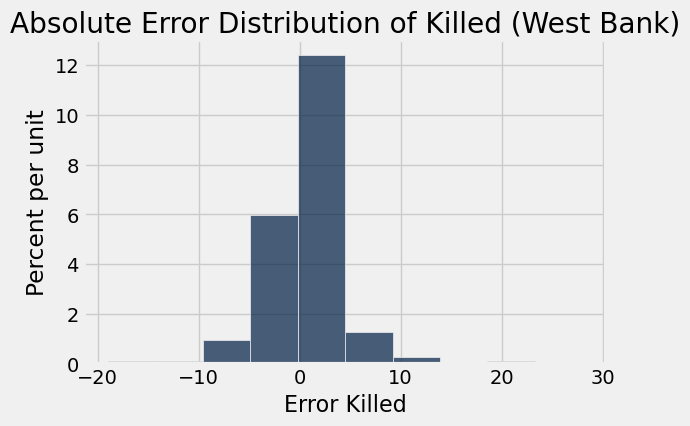

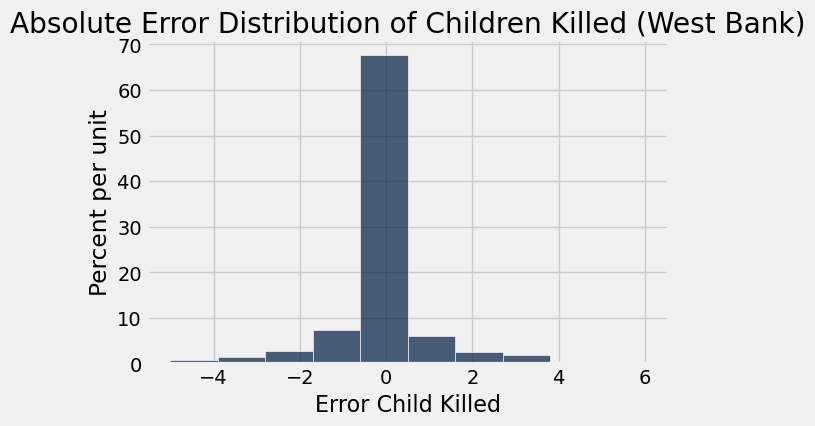

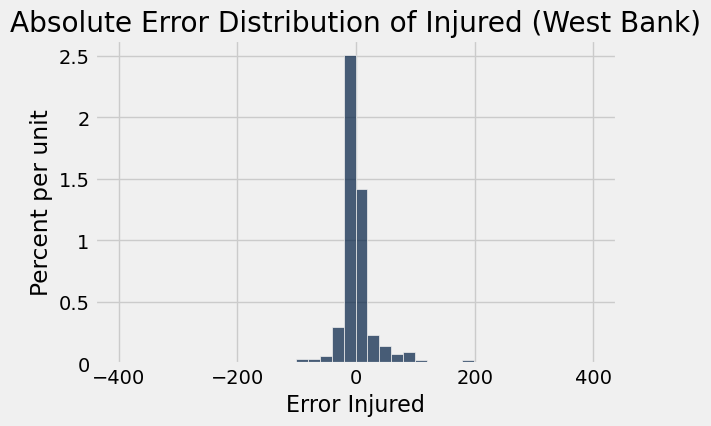

In [441]:
Table().with_column("Error Killed", wb_error_killed).hist()
plt.title("Absolute Error Distribution of Killed (West Bank)")
Table().with_column("Error Child Killed", wb_error_child).hist()
plt.title("Absolute Error Distribution of Children Killed (West Bank)")
Table().with_column("Error Injured", wb_error_injured).hist(bins=np.arange(-401,401,20))
plt.title("Absolute Error Distribution of Injured (West Bank)")
plt.show()

## Plot 2

Highest Error for Killed: 28.0 
Highest Error for Child Killed: 6.0 Highest Error for Injured: 437.0


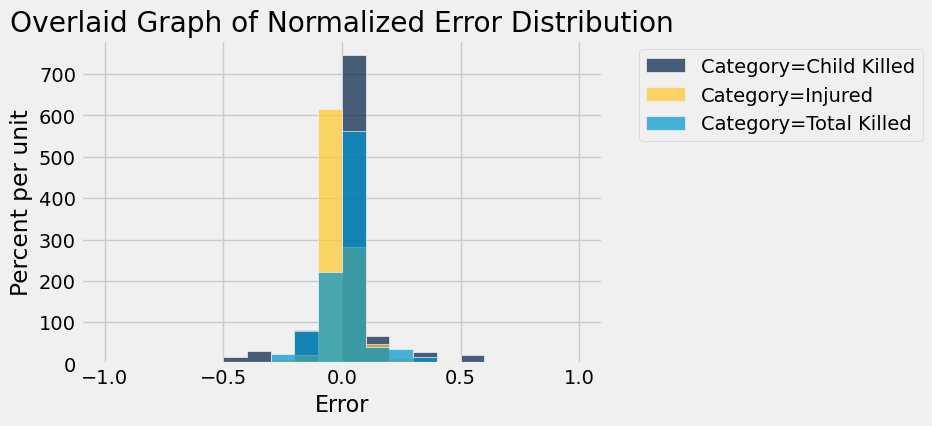

In [444]:
print("Highest Error for Killed:", np.max(wb_error_killed), "\nHighest Error for Child Killed:", np.max(wb_error_child), "Highest Error for Injured:", np.max(wb_error_injured))
Table().with_columns(["Error", wb_error_stat_norm,
                   "Category", wb_error_cat]).hist(group="Category", bins=np.arange(-1,1.001, 0.1))
plt.title("Overlaid Graph of Normalized Error Distribution")
plt.show()

### Values and Insights gained from the histograms
* For Total Killed and Children Killed, the errors between flash reports and verified UN reports are centered very close to zero. The errors are relatively small within ±10 deaths for total killed, and ±2 deaths for children killed.

* The Injured category shows a wider error spread compared to the killed categories. You can see large errors in injuries, sometimes reaching up to ± 100 injured individuals in a day. But this only accounts for a few, the majority of flash reports are  still highly accurate settling around ±20 error.

* We normalized each value using the max value in each category so that they are all on the same scale with values between 0-1 so that we can generate an overlaid histogram, Below are the max values of each category:

    1. Max Error Killed: 28.0
    2. Max Error Child Kileld: 6.0
    3. Max Error Injured: 437.0


* From the overlaid histogram, we can see that there are more spread for total and child killed errors reaching over .5 but since their max error value is  low at 28.0 and 6.0, respectively, the absolute error calculated will still be relatively low meaning that the flash reports are generally accurate with regards to deaths. 

* For example, if the normalized error is 0.5 for an error in total and child killed. Then the absolute error will be (0.5 * 28) = 14 and (0.5 * 6) = 3 which are relatively low error values.

* Meanwhile with injuries, even if they have less spread in the normalized histogram but due to having their max error value at 437.0 a slight spread away from the center (0 error) result in a larger change in absolute error.

* For instance, if the normalized error is 0.05, then (0.05 * 437) = 21.85. If the normalized error is 0.1, then ( 0.1 * 437 ) = 43.7. A change in 0.05 for normalized error resulted in 21.85 change in absolute error. Therefore, the error are wider for injury reports making them less reliable compared to reports of deaths. Overall, most of the normalized error of injuries rest between -0.1 and 0.1, so we can still conclude that the injury flash reports are still moderately accurate and not too far off from verified reports.

* Flash reporting of fatalities in the West Bank is generally accurate and reliable with little to no bias, particularly for total and children deaths, with most errors clustering tightly around zero. However, injury reports show greater variability, suggesting that injuries are harder to document reliably in real-time. Overall, while flash reports provide a useful early estimate of fatalities, slight caution is needed when interpreting reported injury figures without later verification.

* In the end, humanitarian organization and political actors can rely on and use early data through flash reports for immediate decision-making and provide the necessary relief efforts for the Palestinians in quick time without wating for data to be verified.

## Settler Attacks causes more Injuries/Killed in West Bank (Bar Chart)

In [448]:
wb_set_att = westbank_casualties.select("killed_cum","injured_cum", "settler_attacks_cum")
wb_set_att

killed_cum,injured_cum,settler_attacks_cum
3,23,3
13,194,9
15,295,19
19,332,29
26,427,39
33,500,49
43,700,63
54,1150,67
61,1173,70
61,1176,70


In [450]:
# Daily Number of settler attacks
wb_diff_settler_attacks_cum = daily_stats_from_cumulative(westbank_casualties, "settler_attacks_cum")

In [452]:
wb_set_att = wb_set_att.with_columns(["Daily Injured", wb_diff_injured_cum,
                         "Daily killed", wb_diff_killed_cum, 
                         "Daily Settler Attacks", wb_diff_settler_attacks_cum]).drop(0,1,2)
wb_set_att

Daily Injured,Daily killed,Daily Settler Attacks
23,3,3
171,10,6
101,2,10
37,4,10
95,7,10
73,7,10
200,10,14
450,11,4
23,7,3
3,0,0


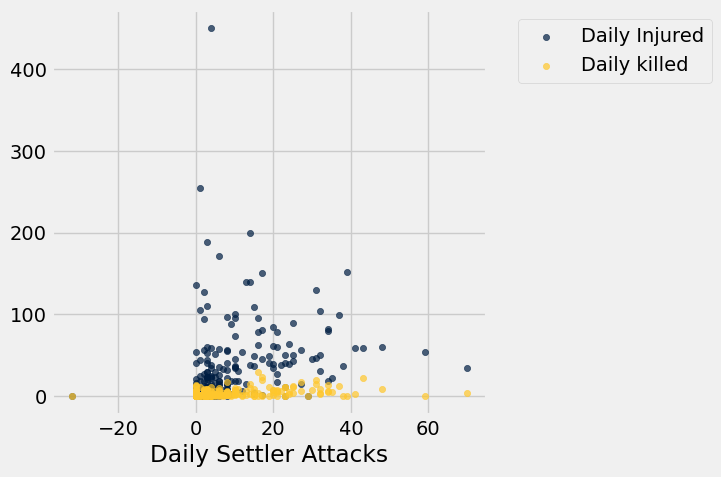

In [454]:
wb_set_att.scatter("Daily Settler Attacks")
plt.show()

In [456]:
# Negative diff in a cumulative data doesn't make sense (Need to be cleaned)
wb_set_att.where("Daily Settler Attacks", are.below(0))

Daily Injured,Daily killed,Daily Settler Attacks
0,0,-32


In [458]:
# Remove the row
wb_set_att = wb_set_att.where("Daily Settler Attacks", are.above_or_equal_to(0))

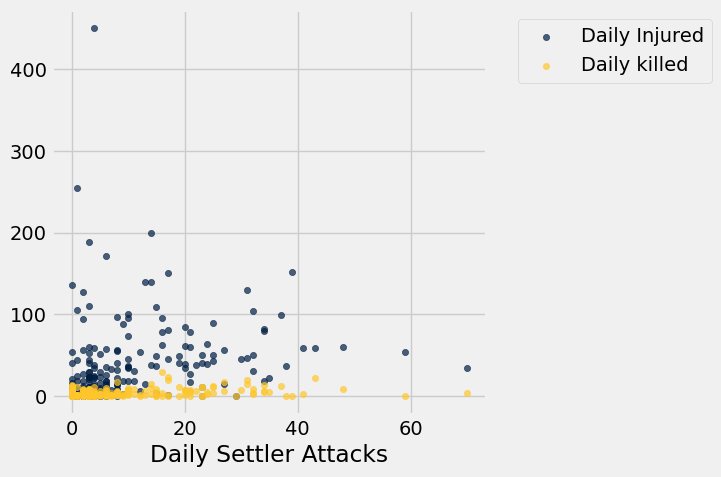

In [460]:
wb_set_att.scatter("Daily Settler Attacks")
plt.show()

In [462]:
# Lets delve more to see if we can see a much clearer difference between days without settler attacks and vice-versa
wb_set_att = wb_set_att.with_column("Is Settler Attack Day", wb_set_att.column("Daily Settler Attacks") != 0)
wb_set_att

Daily Injured,Daily killed,Daily Settler Attacks,Is Settler Attack Day
23,3,3,True
171,10,6,True
101,2,10,True
37,4,10,True
95,7,10,True
73,7,10,True
200,10,14,True
450,11,4,True
23,7,3,True
3,0,0,False


In [464]:
wb_set_att.drop(2).group("Is Settler Attack Day")

Is Settler Attack Day,count
False,373
True,177


In [466]:
wb_set_att_group = wb_set_att.drop(2).group("Is Settler Attack Day", sum).relabeled("Is Settler Attack Day", "Settler Attack Day")
wb_set_att_group

Settler Attack Day,Daily Injured sum,Daily killed sum
False,337,147
True,7276,750


## Plot 3

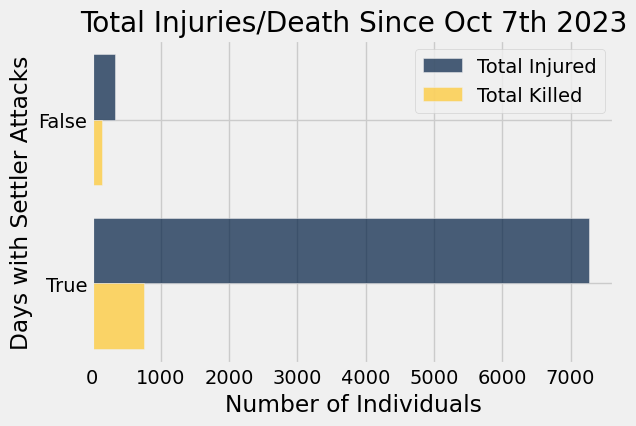

In [469]:
# A big difference can be seen from the table above lets visualize it into a bar chart to get a clearer view.
wb_set_att_group.barh("Settler Attack Day")
plt.title("Total Injuries/Death Since Oct 7th 2023")
plt.legend(["Total Injured", "Total Killed"])
plt.xlabel("Number of Individuals")
plt.ylabel("Days with Settler Attacks")
plt.show()

### Insights from the above bar chart
1. Most casualties occurred on days with Israeli settler attacks with 750 dead while on other days, it only amounts to 147 deaths. Injuries on settler-attack days far exceed those on days without with values 7276 and 337 deaths, respectively. This implies that Settler attacks are not isolated events, they occur alongside or escalate broader violence involving killings and injuries.
2. Casualties still occur without settler attacks, but at a lower scale, even on days with no reported settler attacks, there are injuries and deaths. This shows the multi-dimensional nature of violence (e.g. military operations, clashes, raids).
3. The data shows a clear association between settler attacks and higher casualty counts. While violence also exists independently, settler-attack days coincide with disproportionate harm to Palestinians in the West Bank, highlighting that they are not there just to protest but also cause unecessary harm to the palestinians. This pattern is worth monitoring and provide evidence for prevention and accountability.

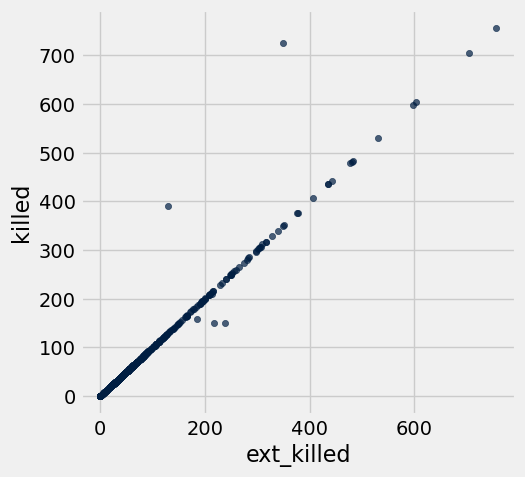

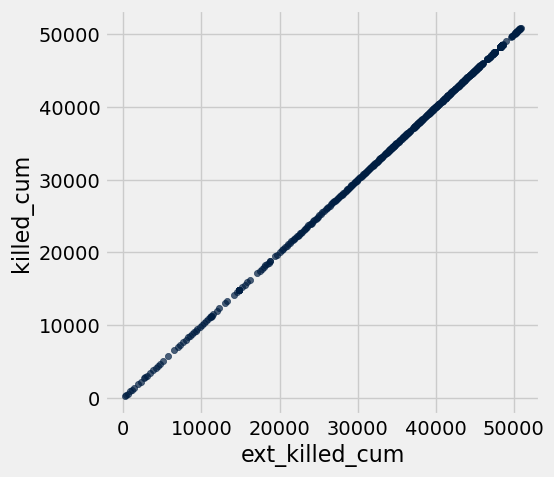

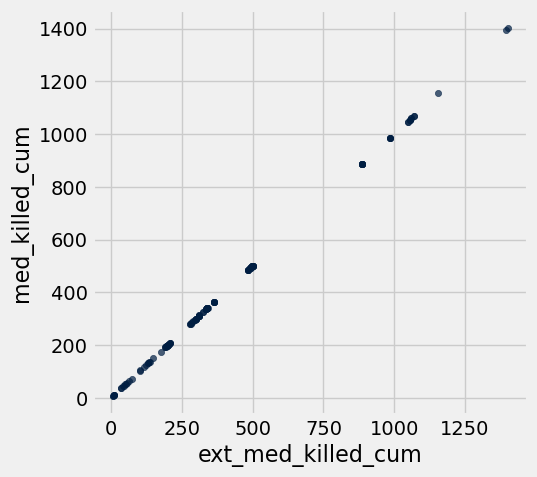

In [472]:
gaza_casualties.scatter("ext_killed", "killed")
gaza_casualties.scatter("ext_killed_cum", "killed_cum")
gaza_casualties.scatter("ext_med_killed_cum", "med_killed_cum")
plt.show()

'ext_killed' has some different values with 'killed'. Therefore, we will instead calculate daily death using 'ext_killed_cum' for better accuracy.

In [475]:
daily_death_civdef = daily_stats_from_cumulative(gaza_casualties, "ext_civdef_killed_cum")
daily_death_med = daily_stats_from_cumulative(gaza_casualties, "ext_med_killed_cum")

daily_death_civdef[:20], daily_death_med[:20]

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 array([ 6,  0,  0,  0,  4,  1,  0,  0,  0, 26,  0,  0,  7,  2,  5,  3,  3,
         8,  8, 28]))

In [477]:
daily_death_services = daily_death_civdef + daily_death_med
daily_death_services[:20]

array([ 6,  0,  0,  0,  4,  1,  0,  0,  0, 33,  0,  0,  7,  2,  5,  3,  3,
        8,  8, 28])

In [479]:
daily_total_child_killed = daily_stats_from_cumulative(gaza_casualties, "ext_killed_children_cum")
daily_total_child_killed[:20]

array([  0,  78,  13, 169, 138, 102,   0, 100, 100, 153,  87,  60, 524,
       232,   0, 117, 182, 305, 344, 334])

In [481]:
daily_total_women_killed = daily_stats_from_cumulative(gaza_casualties, "ext_killed_women_cum")
daily_total_women_killed[:20]

array([  0,  41,  20, 169,   0,  46, 116, 208, 135, 201,   0,   0,   0,
         0,  31,  56,  96, 173, 292,  16])

In [483]:
#Excluding the medical, civil defense people, women, and children
daily_total_killed = daily_stats_from_cumulative(gaza_casualties, "ext_killed_cum") - daily_death_services - daily_total_child_killed - daily_total_women_killed
daily_total_killed[:20]

array([ 226,   19,  157,    2,   58,  168,  367,   20,  207, -249,  105,
        418, -224,  118,  212,   90,  155,  218,  112,  103])

In [485]:
gz_serv_peop_deaths = Table().with_columns(["Daily Men Killed", daily_total_killed,
                                            "Daily Women Killed", daily_total_women_killed,
                                            "Daily Children Killed", daily_total_child_killed,
                                            "Daily Med and Civ Def Killed", daily_death_services,
                                           ])
gz_serv_peop_deaths

Daily Men Killed,Daily Women Killed,Daily Children Killed,Daily Med and Civ Def Killed
226,0,0,6
19,41,78,0
157,20,13,0
2,169,169,0
58,0,138,4
168,46,102,1
367,116,0,0
20,208,100,0
207,135,100,0
-249,201,153,33


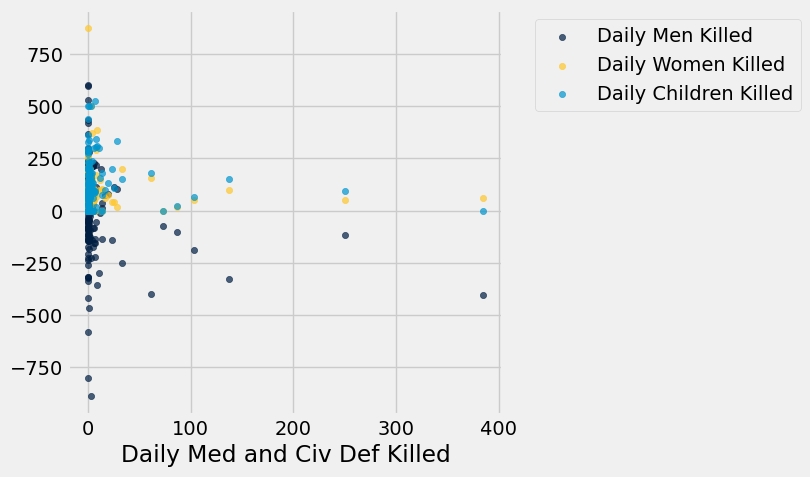

In [487]:
# Doesnt really show any relationship
gz_serv_peop_deaths.scatter("Daily Med and Civ Def Killed")
plt.show()

In [489]:
np.sum(gz_serv_peop_deaths.column("Daily Men Killed") < 0)

78

In [491]:
# Removing negative values because Daily 'total killed' should not be negative if its the total after being substracted initially.
gz_serv_peop_deaths = gz_serv_peop_deaths.where("Daily Children Killed", are.above_or_equal_to(0)).where("Daily Men Killed", are.above_or_equal_to(0)).where("Daily Women Killed", are.above_or_equal_to(0)).where("Daily Med and Civ Def Killed", are.above_or_equal_to(0))
gz_serv_peop_deaths

Daily Men Killed,Daily Women Killed,Daily Children Killed,Daily Med and Civ Def Killed
226,0,0,6
19,41,78,0
157,20,13,0
2,169,169,0
58,0,138,4
168,46,102,1
367,116,0,0
20,208,100,0
207,135,100,0
105,0,87,0


In [493]:
is_service_killed_days = gz_serv_peop_deaths.column(3) != 0
gz_serv_peop_deaths = gz_serv_peop_deaths.with_column("Is E/M Serivce Killed Days", is_service_killed_days)
gz_serv_peop_deaths

Daily Men Killed,Daily Women Killed,Daily Children Killed,Daily Med and Civ Def Killed,Is E/M Serivce Killed Days
226,0,0,6,True
19,41,78,0,False
157,20,13,0,False
2,169,169,0,False
58,0,138,4,True
168,46,102,1,True
367,116,0,0,False
20,208,100,0,False
207,135,100,0,False
105,0,87,0,False


In [310]:
gz_serv_peop_deaths_sum = gz_serv_peop_deaths.group("Is E/M Serivce Killed Days", np.sum)
gz_serv_peop_deaths_sum

Is E/M Serivce Killed Days,Daily Men Killed sum,Daily Women Killed sum,Daily Children Killed sum,Daily Med and Civ Def Killed sum
False,28158,1391,2076,0
True,4107,2558,4075,234


In [312]:
gz_serv_peop_deaths_count = gz_serv_peop_deaths.group("Is E/M Serivce Killed Days")
gz_serv_peop_deaths_count

Is E/M Serivce Killed Days,count
False,433
True,40


In [314]:
# Lets get the rate of daily average death between the two categories
gz_serv_peop_deaths_avg = gz_serv_peop_deaths.group("Is E/M Serivce Killed Days", np.average)
gz_serv_peop_deaths_avg = gz_serv_peop_deaths_avg.relabeled("Daily Men Killed average", "Men Death Rate").relabeled("Daily Children Killed average", "Children Death Rate").relabeled("Daily Women Killed average", "Women Death Rate").drop(4)
gz_serv_peop_deaths_avg

Is E/M Serivce Killed Days,Men Death Rate,Women Death Rate,Children Death Rate
False,65.03,3.21247,4.79446
True,102.675,63.95,101.875


## Plot 4

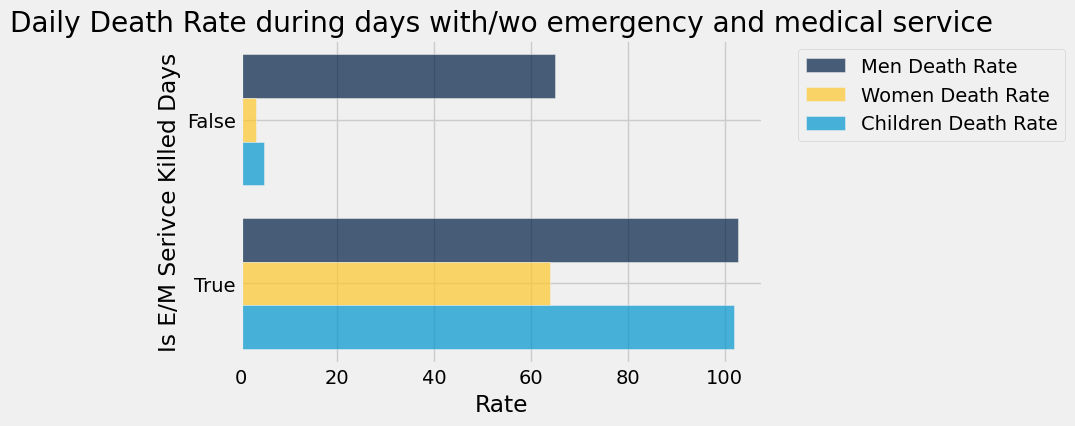

In [317]:
gz_serv_peop_deaths_avg.barh("Is E/M Serivce Killed Days")
plt.title("Daily Death Rate during days with/wo emergency and medical service")
plt.xlabel("Rate")
plt.show()

### Insights from the above bar chart
1. Although day-to-day variability is high (as seen in the scatter plot), the group averages indicate that days when emergency service personnel are killed are associated with a significantly higher number of civilian deaths.
   
2. Men's death rate is significantly higher on 'E/M Service Killed Days' from 65 to nearly 102/day. Overall, the total death rate essentially almost doubles when medics or civil defense teams are killed.

3. Child and women death rates are 20+ times higher on days when emergency services are attacked. During "E/M Service Killed Days", child deaths spike to over 100 per day while on non-service-killed days, child death rate is close to 5. Similarly, women killed on "E/M Service Killed Days" amount to 63 per day while on other days, it is significantly lower to about 3 per day. This shows that when medical/rescue services are attacked, children and women are disproportionately affected. This could be because during time of conflict, children are not able to react when such a situation happens and it also very overwhelming to handle for women as both are much weaker physically in general. Therefore, any denied or delayed emergency care can greatly affect the number of children and women death. Other highly potential reasons are the collapse of evacuation/rescue infrastructure from Israel's attacks preventing guiding children and women from escaping the conflict area.

4. It can be said that the presence of emergency response directly affects survivability, especially to children and women. Attacking those E/M teams increases overall lethality of conflict events. Therefore, this strong association create greater awareness of the importance in personnel aid and when their number decrease after an attack, humanitarian aid and political people should rush and provide the necessary relief efforts and reinforce emergency services in such moments of crisis.

### Histogram representing the distrbution of individuals killed based on gender. (May be used)

In [321]:
killed_in_gaza.column('Age').max()

110

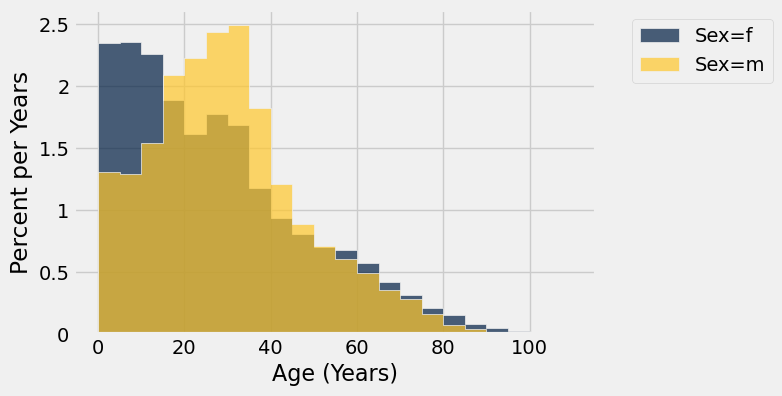

In [323]:
# Lets check the age and gender distribution of individuals killed in Gaza.
killed_in_gaza.hist("Age", bins=np.arange(0,115,5), group="Sex", unit="Years")
plt.show()

In [325]:
killed_in_gaza.group("Sex")

Sex,count
f,16504
m,33516


### Plot 5: Monthly Destruction - Educational Buildings vs. Places of Worship
Comparing the monthly destruction trends for educational buildings and places of worship (mosques and churches combined) in Gaza.

year-month,Monthly Edu Destroyed,Monthly Worship Destroyed
2023-10,43,48
2023-11,23,49
2023-12,26,25
2024-01,7,48
2024-02,1,44
2024-03,0,17
2024-04,3,15
2024-05,6,361
2024-06,3,4
2024-07,5,2


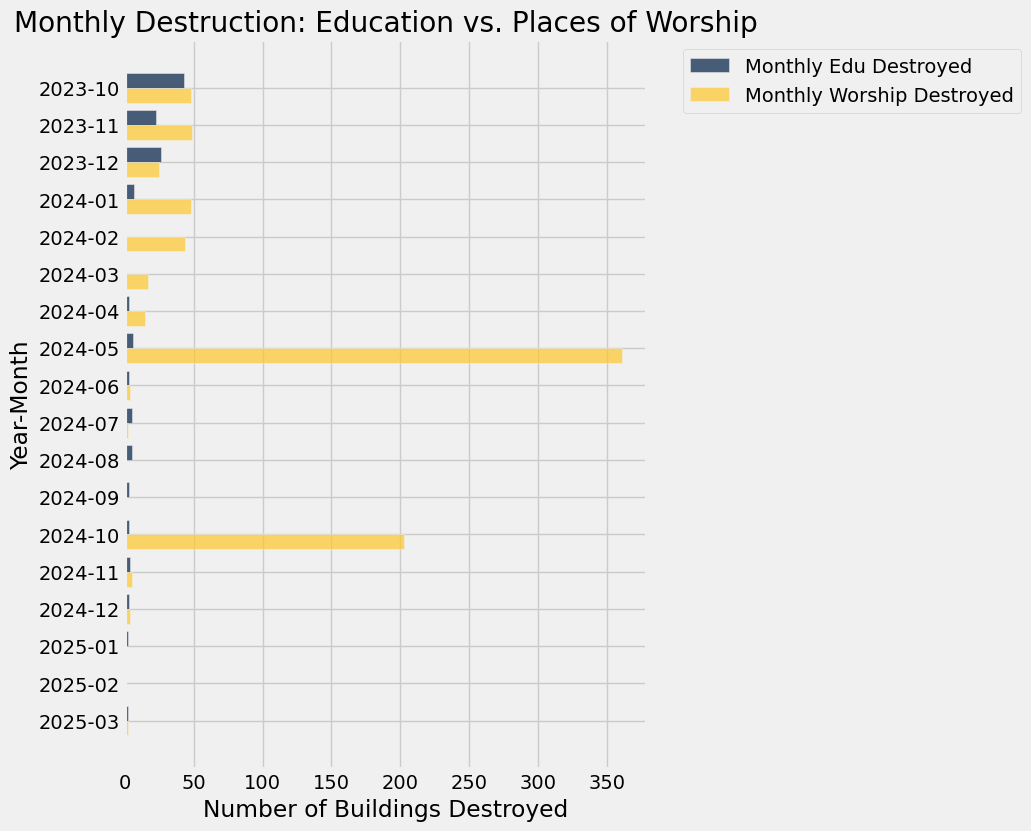

In [328]:
# Preparing data for infrastructure comparison
infra_monthly = infrastructure.select(
    'report_date', 'edu_ext_destroyed', 'worship_ext_mosques_destroyed', 'worship_ext_churches_destroyed'
)

# Calculating total worship destruction
total_worship_destroyed = infra_monthly.column('worship_ext_mosques_destroyed') + infra_monthly.column('worship_ext_churches_destroyed')
infra_monthly = infra_monthly.with_column('total_worship_ext_destroyed', total_worship_destroyed).drop(
    'worship_ext_mosques_destroyed', 'worship_ext_churches_destroyed'
)

# Adding year-month column
year_and_month_infra = infra_monthly.apply(extract_month_and_year_from_date, 'report_date')
infra_monthly = infra_monthly.with_column("year-month", year_and_month_infra)

# Grouping by month and get max cumulative value
infra_grouped_monthly = infra_monthly.group('year-month', np.max).drop('report_date max')

# Function to calculate monthly difference from cumulative
def calculate_monthly_diff(cumulative_array):
    monthly_diff = [cumulative_array[0]]
    for i in range(1, len(cumulative_array)):
        diff = cumulative_array[i] - cumulative_array[i - 1]
        # Handle potential negative differences due to data corrections by setting them to 0
        monthly_diff.append(max(0, diff))
    return monthly_diff

# Calculating monthly destruction for education and worship
monthly_edu_destroyed = calculate_monthly_diff(infra_grouped_monthly.column('edu_ext_destroyed max'))
monthly_worship_destroyed = calculate_monthly_diff(infra_grouped_monthly.column('total_worship_ext_destroyed max'))

# Adding monthly values to the table
infra_final_monthly = infra_grouped_monthly.with_columns(
    'Monthly Edu Destroyed', monthly_edu_destroyed,
    'Monthly Worship Destroyed', monthly_worship_destroyed
).select('year-month', 'Monthly Edu Destroyed', 'Monthly Worship Destroyed')

infra_final_monthly.show()

# Creating overlaid bar chart
infra_final_monthly.barh('year-month')
plt.title('Monthly Destruction: Education vs. Places of Worship')
plt.xlabel('Number of Buildings Destroyed')
plt.ylabel('Year-Month')
plt.show()

**Insights from Plot 5:**

*   The bar chart shows the estimated number of educational buildings and places of worship destroyed each month.
*   Similar to residential buildings, the initial months (Oct-Dec 2023) saw significant destruction in both categories, though the scale for these is much smaller than residential.
*   Destruction of educational facilities appears more sporadic in later months compared to places of worship, which show some peaks (e.g., June 2024, similar to residential).
*   Periods of ceasefire (like early 2025) show minimal destruction in both categories, reinforcing the link between active conflict phases and infrastructure damage.
*   Comparing this to the residential destruction plot reveals different scales but similar temporal patterns, suggesting widespread impact across various civilian infrastructure types during high-intensity periods.

### Plot 6: Daily Deaths in Gaza - Children vs. Women
Comparing the daily number of deaths reported for children versus women in Gaza, using the cleaned data derived from cumulative figures.

Data used for Plot 6:


Daily Men Killed,Daily Women Killed,Daily Children Killed,Daily Med and Civ Def Killed,Is E/M Serivce Killed Days
226,0,0,6,True
19,41,78,0,False
157,20,13,0,False
2,169,169,0,False
58,0,138,4,True


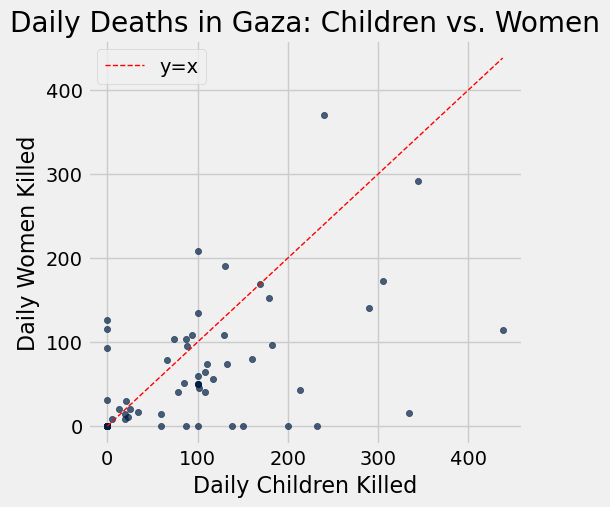

In [332]:

print("Data used for Plot 6:")
gz_serv_peop_deaths.show(5)

# Creating scatter plot
gz_serv_peop_deaths.scatter('Daily Children Killed', 'Daily Women Killed')
plt.title('Daily Deaths in Gaza: Children vs. Women')
plt.xlabel('Daily Children Killed')
plt.ylabel('Daily Women Killed')
# Adding a line y=x for reference
max_val = max(gz_serv_peop_deaths.column('Daily Children Killed').max(), gz_serv_peop_deaths.column('Daily Women Killed').max())
plt.plot([0, max_val], [0, max_val], color='red', linestyle='--', lw=1, label='y=x')
plt.legend()
plt.show()

**Insights from Plot 6:**

*   The scatter plot compares the number of children killed versus women killed on the same day.
*   There appears to be a positive correlation: days with higher numbers of child deaths tend to also have higher numbers of women deaths. Many points cluster near the origin (low deaths for both), but there's a clear trend extending outwards.
*   Many points lie close to the y=x line, suggesting that on many days, the number of reported child deaths and women deaths were somewhat similar in magnitude.
*   However, there are days where one significantly outnumbers the other (points far from the y=x line), indicating variability in the daily impact on these specific groups. The points seem slightly more spread above the y=x line, potentially suggesting days where child deaths exceeded women deaths more often or by a larger margin than the reverse, but this requires closer examination or statistical testing (like in Hypothesis Test 3).

## 3. Hypothesis Testing

#### 3.1 Does the day when emergency and medical services' individuals are killed result in higher civilian deaths?

**Null Hypothesis**: In the population, the distributions of deaths on days with/wo emergency services's deaths are the same. (They are different in the sample just due to chance.)

**Alternative Hypothesis**: In the population, on days with emergency services dead, death numbers are **higher**, on average, than on days without any emergency services individuals dead.

Keys: _E = Emergency_, _M = Medical_

**Test Statistic Used**: Average Deaths on E/M Service Killed Days − Average Deaths on E/M Service Killed Days

**Reason**: This shows whether there is an effect or not on the number of deaths between days when E/M services are killed and vice-versa

**Meaning**: 
1. Small Values (Close to Zero) = No real effect
2. Negative Values = On average, Less number of civilians are killed on days when E/M services are killed
3. Large Positive Values = On average, more number of civilians are killed on days when E/M services are killed

**Significance Level**: We will conduct the hypothesis test at a significance level of **1%**

In [338]:
gz_serv_peop_deaths

Daily Men Killed,Daily Women Killed,Daily Children Killed,Daily Med and Civ Def Killed,Is E/M Serivce Killed Days
226,0,0,6,True
19,41,78,0,False
157,20,13,0,False
2,169,169,0,False
58,0,138,4,True
168,46,102,1,True
367,116,0,0,False
20,208,100,0,False
207,135,100,0,False
105,0,87,0,False


In [342]:
civilian_deaths = gz_serv_peop_deaths.column("Daily Killed") + gz_serv_peop_deaths.column("Daily Children Killed") + gz_serv_peop_deaths.column("Daily Women Killed")
gz_civilian_deaths = gz_serv_peop_deaths.drop(0,1,2,3).with_column("Total Civlians Killed", civilian_deaths)
gz_civilian_deaths

ValueError: The column "Daily Killed" is not in the table. The table contains these columns: Daily Men Killed, Daily Women Killed, Daily Children Killed, Daily Med and Civ Def Killed, Is E/M Serivce Killed Days

In [344]:
gz_civilian_death_avg = gz_civilian_deaths.group("Is E/M Serivce Killed Days", np.average)
gz_civilian_death_avg

NameError: name 'gz_civilian_deaths' is not defined

In [346]:
observed_statistic = gz_civilian_death_avg.column(1).item(1) - gz_civilian_death_avg.column(1).item(0)
observed_statistic

NameError: name 'gz_civilian_death_avg' is not defined

In [348]:
def difference_of_means(table, numeric_label, category_label):
    """
    Takes: 
       - name of table
       - column label of numerical variable
       - column label of categorical variable
       
    Returns: Difference of means of the two groups
    """
    
    #table with the two relevant columns
    reduced = table.select(numeric_label, category_label)  
    
    # table containing group means
    means_table = reduced.group(category_label, np.average)
    
    # array of group means
    means = means_table.column(1)
    
    return means.item(1) - means.item(0)

In [350]:
difference_of_means(gz_civilian_deaths, "Total Civlians Killed", "Is E/M Serivce Killed Days")

NameError: name 'gz_civilian_deaths' is not defined

In [352]:
gz_civilian_deaths

NameError: name 'gz_civilian_deaths' is not defined

#### Simulation Steps
1. Simulate by randomly shuffling the "Is Service Killed Days" labels among all days.
2. Every shuffle calculate the simulated test statistic.
3. Append the statistic to an array of test statistics.
4. Repeat 10000 times to form an empirical distribution of the test statistic under the null hypothesis.

In [355]:
def one_simulated_difference(table, numeric_label, category_label):
    """
    Takes: 
       - name of table
       - column label of numerical variable
       - column label of categorical variable
       
    Returns: Difference of means of the two groups
    """
    
    # array of shuffled labels
    shuffled_labels = table.sample(with_replacement = False).column(category_label)
    
    # table of numerical variable and shuffled labels
    shuffled_table = table.select(numeric_label).with_column('Shuffled Label', shuffled_labels)
    
    return difference_of_means(shuffled_table, numeric_label, 'Shuffled Label')   

In [357]:
avg_differences = make_array()

for i in np.arange(10000):
    new_avg_difference = one_simulated_difference(gz_civilian_deaths, 'Total Civlians Killed', 'Is E/M Serivce Killed Days')
    avg_differences = np.append(avg_differences, new_avg_difference)

NameError: name 'gz_civilian_deaths' is not defined

In [359]:
Table().with_column('Difference Between Group Means', avg_differences).hist()
print('Observed Statistic:', observed_statistic)
plt.title('Empirical Distribution of the mean differences under the Null Hypothesis', fontsize=14);
plt.scatter(observed_statistic, -.0001, color='red', s=50);
plt.show()

NameError: name 'observed_statistic' is not defined

#### Simulation Results
1. We will calculate the p-value
2. If p-value < 0.01, we will reject the null hypothesis and conclude that death of E/M Services significantly increases number of civilian deaths.

In [362]:
# It can already be clearly seen that it rejects the null hypothesis but we will still compute the p-value to be sure.
pvalue = np.sum(avg_differences > observed_statistic)/len(avg_differences)
pvalue

NameError: name 'observed_statistic' is not defined

**Conclusion**: Since the p-value is less than 0.01, we reject the null hypothesis. We conclude that the deaths of emergency and medical services personnel are significantly associated with an increase in the number of civilian deaths and is not just due to random chance.

#### 3.2 Is the age distribution of killed individuals different from Gaza's population distribution?

**Background:** According to demographic data, Gaza's population has the following approximate age structure:
*   Ages 0–14: ~39.75%
*   Ages 15–64: ~57.34%
*   Ages 65 and over: ~2.91%

We want to test if the age distribution of the individuals recorded in the `killed_in_gaza` dataset significantly deviates from this known population structure.

**Null Hypothesis**: The age distribution of individuals killed in Gaza (in our sample) follows the general population age distribution. Any observed difference between the sample distribution and the population distribution is due to random chance in sampling.

**Alternative Hypothesis**: The age distribution of individuals killed in Gaza (in our sample) is different from the general population age distribution. The observed difference is not just due to random chance, suggesting certain age groups are disproportionately affected.

**Test Statistic Used**: Total Variation Distance (TVD)
*   TVD = `sum(abs(observed_proportions - population_proportions)) / 2`

**Reason**: TVD measures the total difference between two categorical distributions. It quantifies how much one distribution needs to shift to match the other.

**Meaning**:
*   Small Values (Close to Zero): The observed distribution of killed individuals is very similar to the general population distribution.
*   Large Positive Values (Closer to 1): The observed distribution is very different from the general population distribution.

**Significance Level**: We will conduct the hypothesis test at a significance level of **1%**.

Sample Size: 50020


Age Group,Observed Proportion,Population Proportion
0-14,0.253179,0.3975
15-64,0.695842,0.5734
65+,0.0509796,0.0291


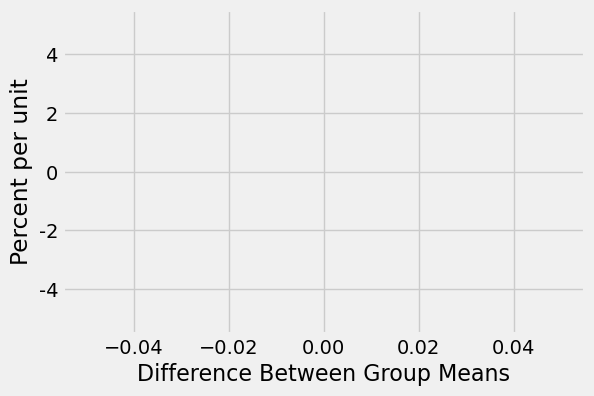

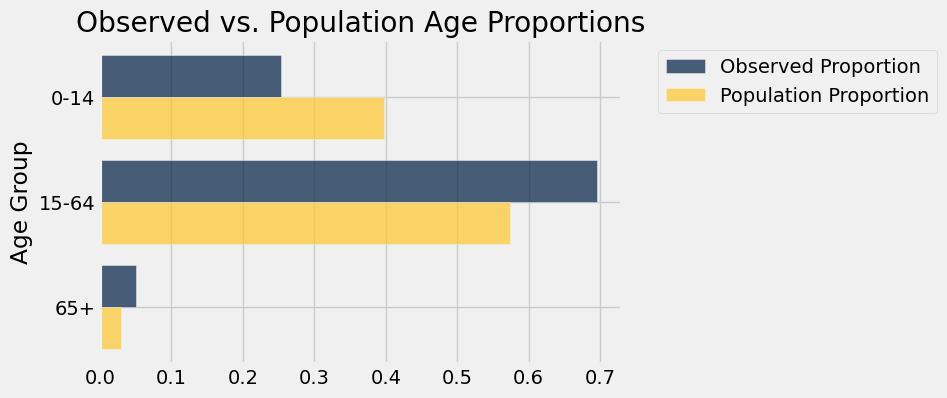

In [366]:
# Preparing the data for Hypothesis Test 2
sampleSize = killed_in_gaza.num_rows
people_table = killed_in_gaza.select('Age') # Selecting only the Age column initially

# Defining the age grouping function
def create_age_group(age):
    if age <= 14:
        return '0-14'
    elif age <= 64:
        return '15-64'
    else:
        return '65+'

# Applying the function to create age groups
people_table = people_table.with_column(
    'Age Group',
    people_table.apply(create_age_group, 'Age')
)

# Calculating observed proportions in the sample
age_groups_observed = people_table.group('Age Group')
observed_proportions = age_groups_observed.column('count') / sampleSize

# Adding observed proportions and known population proportions to the table
known_population_proportions = make_array(0.3975, 0.5734, 0.0291) # Order: 0-14, 15-64, 65+
age_groups_comparison = age_groups_observed.with_columns(
    'Observed Proportion', observed_proportions,
    'Population Proportion', known_population_proportions
).drop('count')

print("Sample Size:", sampleSize)
age_groups_comparison.show()

# Visualizing the comparison
age_groups_comparison.barh('Age Group')
plt.title('Observed vs. Population Age Proportions')
plt.show()

Observed TVD: 0.14432127149140342


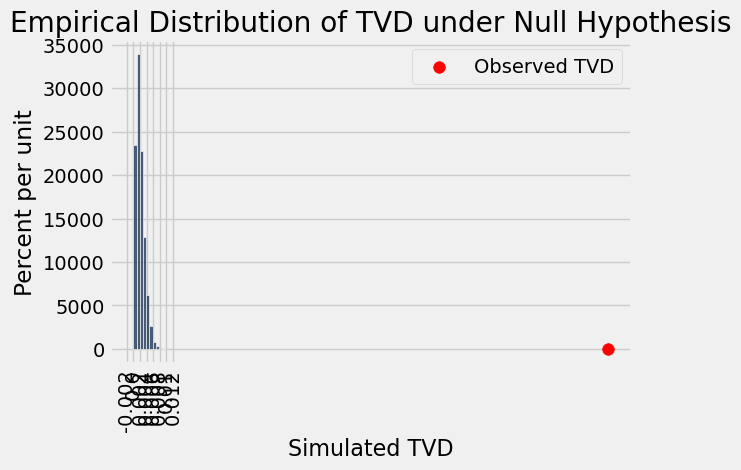

P-value: 0.0


In [368]:
# Defining the Test Statistic function (TVD)
def total_variation_distance(dist1, dist2):
   return sum(abs(dist1 - dist2)) / 2

# Calculating the observed TVD
observed_tvd = total_variation_distance(age_groups_comparison.column('Observed Proportion'),
                                        age_groups_comparison.column('Population Proportion'))
print(f"Observed TVD: {observed_tvd}")

# Simulation under the Null Hypothesis
num_simulations = 10000
simulated_tvds = make_array()

for i in np.arange(num_simulations):
    # Simulating drawing a sample from the population distribution
    simulated_sample_proportions = sample_proportions(sampleSize, known_population_proportions)
    # Calculating the TVD for the simulated sample
    simulated_tvd = total_variation_distance(simulated_sample_proportions, known_population_proportions)
    simulated_tvds = np.append(simulated_tvds, simulated_tvd)

# Visualizing the simulation results
Table().with_column("Simulated TVD", simulated_tvds).hist()
plt.scatter(observed_tvd, -0.1, color='red', s=70, zorder=2, label='Observed TVD')
plt.title('Empirical Distribution of TVD under Null Hypothesis')
plt.legend()
plt.show()

# Calculate the p-value
p_value_tvd = np.count_nonzero(simulated_tvds >= observed_tvd) / num_simulations
print(f"P-value: {p_value_tvd}")

**Conclusion (Hypothesis Test 2)**: The calculated p-value is essentially 0, which is far less than our significance level of 1% (0.01). Therefore, we reject the null hypothesis.

The data provides extremely strong evidence that the age distribution of the individuals killed, as recorded in this dataset, is significantly different from the general age distribution of Gaza's population. The observed differences are highly unlikely to be due to random chance alone, indicating that certain age groups (particularly the 0-14 group, as seen in the bar chart) were disproportionately represented among the casualties compared to their proportion in the overall population.

#### 3.3 Is the average daily number of children killed significantly different from the average daily number of women killed in Gaza?

**Question:** Based on the daily casualty data derived from cumulative reports for Gaza, is there a statistically significant difference between the average number of children killed per day and the average number of women killed per day?

**Data:** Paired daily counts of children killed (`Daily Children Killed`) and women killed (`Daily Women Killed`) from the `gz_serv_peop_deaths` table.

**Null Hypothesis**: In the population of days, the average daily number of children killed is the same as the average daily number of women killed. The average of the *differences* (Children Killed - Women Killed) is zero. Any observed average difference in the sample is due to random daily fluctuations.

**Alternative Hypothesis**: In the population of days, the average daily number of children killed is different from the average daily number of women killed. The average of the *differences* (Children Killed - Women Killed) is not zero.

**Test Statistic Used**: Average of the Daily Differences (`Avg(Daily Children Killed - Daily Women Killed)`)

**Reason**: For paired data, analyzing the difference within each pair (day) controls for factors affecting both groups on that day. We test if the mean of these differences is significantly different from zero.

**Meaning**:
*   Values Close to Zero: On average, the daily number of children and women killed are similar.
*   Large Positive Values: On average, more children are killed per day than women.
*   Large Negative Values: On average, more women are killed per day than children.

**Significance Level**: We will use a significance level of **5%**.

Observed Average Difference (Children - Women): 4.6553911205073994


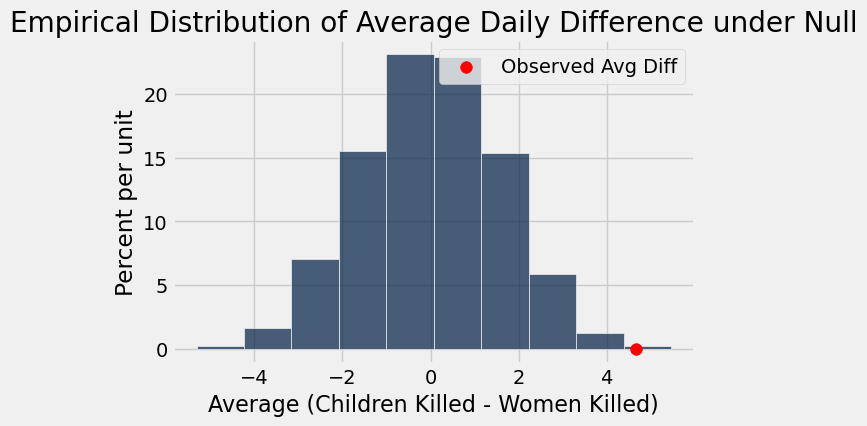

P-value: 0.0017


In [372]:
# Calculating daily differences
daily_diff_child_women = gz_serv_peop_deaths.column('Daily Children Killed') - gz_serv_peop_deaths.column('Daily Women Killed')

# Calculating the observed test statistic (average difference)
observed_avg_difference = np.mean(daily_diff_child_women)
print(f"Observed Average Difference (Children - Women): {observed_avg_difference}")

# Simulation using paired permutation test (randomly flipping signs)
num_simulations_paired = 10000
simulated_avg_differences = make_array()
n_days = len(daily_diff_child_women)

for i in np.arange(num_simulations_paired):
    # Randomly flipping the sign of each difference
    random_signs = np.random.choice(make_array(1, -1), n_days)
    simulated_differences = daily_diff_child_women * random_signs
    # Calculating the average of the simulated differences
    simulated_avg_diff = np.mean(simulated_differences)
    simulated_avg_differences = np.append(simulated_avg_differences, simulated_avg_diff)

# Visualizing the simulation results
Table().with_column("Simulated Average Difference", simulated_avg_differences).hist()
plt.scatter(observed_avg_difference, -0.0001, color='red', s=70, zorder=2, label='Observed Avg Diff')
plt.title('Empirical Distribution of Average Daily Difference under Null')
plt.xlabel('Average (Children Killed - Women Killed)')
plt.legend()
plt.show()

# Calculating the p-value (two-sided test, as we check for *any* difference)
# We look for simulated values as extreme as or more extreme than the observed value in either direction
p_value_paired = np.count_nonzero(np.abs(simulated_avg_differences) >= np.abs(observed_avg_difference)) / num_simulations_paired
print(f"P-value: {p_value_paired}")

**Conclusion (Hypothesis Test 3)**: The observed average difference between daily children killed and daily women killed is positive, suggesting slightly more children were killed on average per day than women in this dataset.

The calculated p-value is less than our significance level of 5% (0.05). Therefore, we reject the null hypothesis.

The data provides statistically significant evidence that the average daily number of children killed in Gaza is different from the average daily number of women killed during the period covered by the data. Specifically, the positive observed average difference suggests that, on average, slightly more children were killed per day than women.